In [1]:
import pandas as pd
import os
from tqdm import tqdm
tqdm.pandas()

In [2]:
DATA_FOLDER = "/mnt/e/sign-lang-data-2"
#ez = load_data.load_data(DATA_FOLDER, "train.csv")

In [3]:
train = pd.read_csv(os.path.join(DATA_FOLDER,"train.csv"))

In [4]:
train

,path,file_id,sequence_id,participant_id,phrase
0,train_landmarks/5414471.parquet,5414471,1816796431,217,3 creekhouse
1,train_landmarks/5414471.parquet,5414471,1816825349,107,scales/kuhaylah
2,train_landmarks/5414471.parquet,5414471,1816909464,1,1383 william lanier
3,train_landmarks/5414471.parquet,5414471,1816967051,63,988 franklin lane
4,train_landmarks/5414471.parquet,5414471,1817123330,89,6920 northeast 661st road
...,...,...,...,...,...
67203,train_landmarks/2118949241.parquet,2118949241,388192924,88,431-366-2913
67204,train_landmarks/2118949241.parquet,2118949241,388225542,154,994-392-3850
67205,train_landmarks/2118949241.parquet,2118949241,388232076,95,https://www.tianjiagenomes.com
67206,train_landmarks/2118949241.parquet,2118949241,388235284,36,90 kerwood circle


In [5]:
parquet = pd.read_parquet(os.path.join(DATA_FOLDER,"supplemental_landmarks/333606065.parquet"))

In [6]:
def count_frame(file):
    df = pd.read_parquet(os.path.join(DATA_FOLDER, file), engine='pyarrow', columns=['frame'])
    return df['frame'].max()

In [ ]:
train['nb_frame'] = train['path'].progress_apply(lambda x: count_frame(os.path.join(DATA_FOLDER, x)))

 54%|█████▍    | 36607/67208 [1:00:01<15:40, 32.54it/s]  

In [8]:
train['nb_frame'].max()

806

In [33]:
all_col = list(parquet.columns)
#print(all_col)
col_face = [x for x in all_col if "x_pose" in x] #face 468 * 3 # 21 * 3 * 2 # 33 * 3
parquet[col_face].head()
col_face

['x_pose_0',
 'x_pose_1',
 'x_pose_2',
 'x_pose_3',
 'x_pose_4',
 'x_pose_5',
 'x_pose_6',
 'x_pose_7',
 'x_pose_8',
 'x_pose_9',
 'x_pose_10',
 'x_pose_11',
 'x_pose_12',
 'x_pose_13',
 'x_pose_14',
 'x_pose_15',
 'x_pose_16',
 'x_pose_17',
 'x_pose_18',
 'x_pose_19',
 'x_pose_20',
 'x_pose_21',
 'x_pose_22',
 'x_pose_23',
 'x_pose_24',
 'x_pose_25',
 'x_pose_26',
 'x_pose_27',
 'x_pose_28',
 'x_pose_29',
 'x_pose_30',
 'x_pose_31',
 'x_pose_32']

In [27]:
parquet.columns

Index(['frame', 'x_face_0', 'x_face_1', 'x_face_2', 'x_face_3', 'x_face_4',
       'x_face_5', 'x_face_6', 'x_face_7', 'x_face_8',
       ...
       'z_right_hand_11', 'z_right_hand_12', 'z_right_hand_13',
       'z_right_hand_14', 'z_right_hand_15', 'z_right_hand_16',
       'z_right_hand_17', 'z_right_hand_18', 'z_right_hand_19',
       'z_right_hand_20'],
      dtype='object', length=1630)

In [15]:
all_col

['frame',
 'x_face_0',
 'x_face_1',
 'x_face_2',
 'x_face_3',
 'x_face_4',
 'x_face_5',
 'x_face_6',
 'x_face_7',
 'x_face_8',
 'x_face_9',
 'x_face_10',
 'x_face_11',
 'x_face_12',
 'x_face_13',
 'x_face_14',
 'x_face_15',
 'x_face_16',
 'x_face_17',
 'x_face_18',
 'x_face_19',
 'x_face_20',
 'x_face_21',
 'x_face_22',
 'x_face_23',
 'x_face_24',
 'x_face_25',
 'x_face_26',
 'x_face_27',
 'x_face_28',
 'x_face_29',
 'x_face_30',
 'x_face_31',
 'x_face_32',
 'x_face_33',
 'x_face_34',
 'x_face_35',
 'x_face_36',
 'x_face_37',
 'x_face_38',
 'x_face_39',
 'x_face_40',
 'x_face_41',
 'x_face_42',
 'x_face_43',
 'x_face_44',
 'x_face_45',
 'x_face_46',
 'x_face_47',
 'x_face_48',
 'x_face_49',
 'x_face_50',
 'x_face_51',
 'x_face_52',
 'x_face_53',
 'x_face_54',
 'x_face_55',
 'x_face_56',
 'x_face_57',
 'x_face_58',
 'x_face_59',
 'x_face_60',
 'x_face_61',
 'x_face_62',
 'x_face_63',
 'x_face_64',
 'x_face_65',
 'x_face_66',
 'x_face_67',
 'x_face_68',
 'x_face_69',
 'x_face_70',
 'x_fa

<Axes: xlabel='sign'>

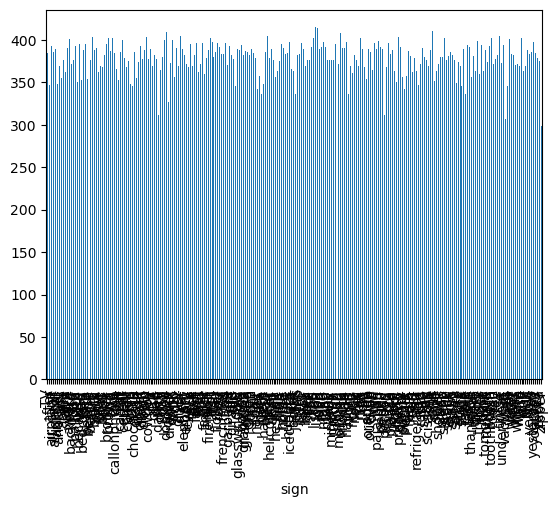

In [11]:
train['sign'].groupby(train['sign']).count().plot(kind='bar')

In [12]:
data_type_res =  res[['type', 'landmark_index']]

In [13]:
nb_frame = res['frame'].max()
nb_frame

7

In [14]:
data_type_res['type'].unique()

array(['face', 'left_hand', 'pose', 'right_hand'], dtype=object)

In [15]:
for t in data_type_res['type'].unique():
    print(data_type_res[data_type_res['type'] == t].max())

type              face
landmark_index     467
dtype: object
type              left_hand
landmark_index           20
dtype: object
type              pose
landmark_index      32
dtype: object
type              right_hand
landmark_index            20
dtype: object


In [16]:
def count_frame(path):
    df = pd.read_parquet(path, engine='pyarrow', columns=['frame'])
    return df['frame'].max()

In [17]:
#train['nb_frame'] = train['path'].progress_apply(lambda x: count_frame(os.path.join(DATA_FOLDER, x)))
train = pd.read_csv(os.path.join(DATA_FOLDER, "train_with_nb_frame.csv"))
#train.to_csv(os.path.join(DATA_FOLDER, "train_with_nb_frame.csv"), index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'asl-signs\\train_with_nb_frame.csv'

In [18]:
train['nb_frame']

KeyError: 'nb_frame'

In [15]:
train['nb_frame'].mean()

67.36137895995851

In [16]:
train['nb_frame'].min()

1

In [17]:
train['nb_frame'].std()

58.98100923190683

In [18]:
train['nb_frame'].max()

546

<Axes: ylabel='Frequency'>

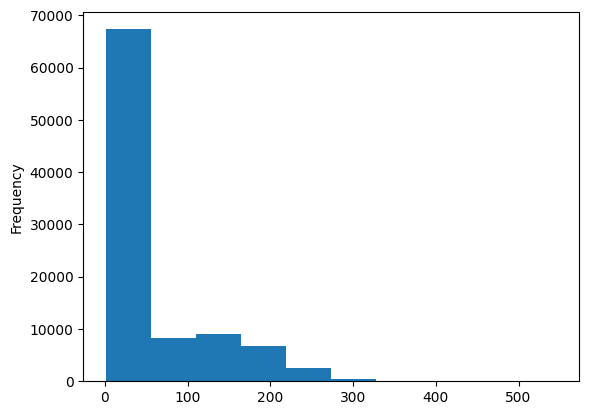

In [19]:
train['nb_frame'].plot(kind='hist')